https://www.finlab.tw/%e8%b6%85%e7%b0%a1%e5%96%ae%e7%94%a8python%e6%8a%93%e5%8f%96%e6%af%8f%e6%9c%88%e7%87%9f%e6%94%b6/

過濾 選股 條件：
1. 去年同月增 100% 以上
2. 上月比較增 10% 以上
3. 營收大於 2000萬
4. 前期比較增 10% 以上

# 參數 設定

In [1]:
#去年同月增，預設 100% 以上
compare_last_year_up = 100

#上月比較增，預設 10% 以上
compare_last_month_up = 10

#營收，預設大於 2000萬
month_revenue = 20000

#前期比較增，預設 10% 以上
compare_last_period_up = 10

#取得 營收 時間
year = 2020
month = 7

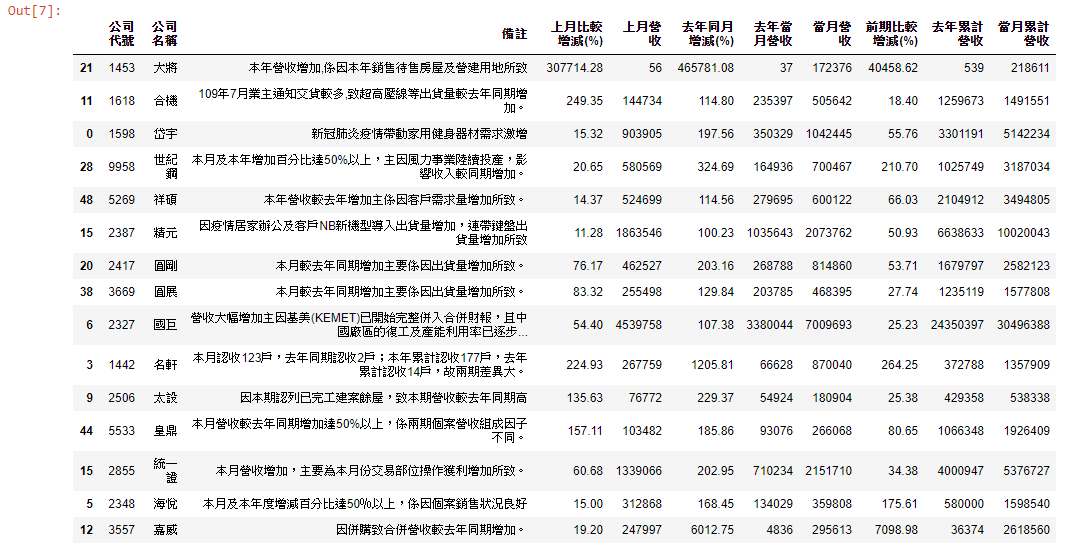

In [2]:
import pandas as pd
import requests
from io import StringIO
import time
def monthly_report(year, month):
    
    # 假如是西元，轉成民國
    if year > 1990:
        year -= 1911
    
    url = 'https://mops.twse.com.tw/nas/t21/sii/t21sc03_'+str(year)+'_'+str(month)+'_0.html'
    if year <= 98:
        url = 'https://mops.twse.com.tw/nas/t21/sii/t21sc03_'+str(year)+'_'+str(month)+'.html'
    
    # 偽瀏覽器
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
    
    # 下載該年月的網站，並用pandas轉換成 dataframe
    r = requests.get(url, headers=headers)
    r.encoding = 'big5'

    dfs = pd.read_html(StringIO(r.text), encoding='big-5')

    df = pd.concat([df for df in dfs if df.shape[1] <= 11 and df.shape[1] > 5])
    
    if 'levels' in dir(df.columns):
        df.columns = df.columns.get_level_values(1)
    else:
        df = df[list(range(0,10))]
        column_index = df.index[(df[0] == '公司代號')][0]
        df.columns = df.iloc[column_index]
    
    df['當月營收'] = pd.to_numeric(df['當月營收'], 'coerce')
    df = df[~df['當月營收'].isnull()]
    df = df[df['公司代號'] != '合計']
    
    # 偽停頓
    time.sleep(5)

    return df

In [3]:
# 民國100年1月
#monthly_report(100,1)

# 西元2011年1月
df = monthly_report(year,month)

In [4]:
df_new = df

In [5]:
df_new.drop(1,axis=0,inplace=True)

In [6]:
df_new

,公司代號,公司名稱,備註,上月比較增減(%),上月營收,去年同月增減(%),去年當月營收,當月營收,前期比較增減(%),去年累計營收,當月累計營收
0,1101,台泥,-,2.18,9961312,-2.96,10489337,10178622,-6.83,67212820,62618332
2,1103,嘉泥,-,3.81,166768,8.85,159044,173129,11.04,1049488,1165448
3,1104,環泥,-,5.17,453562,19.78,398238,477040,10.39,2779704,3068671
4,1108,幸福,-,6.49,360616,22.61,313198,384035,27.43,2048651,2610731
5,1109,信大,-,7.35,611254,9.75,597879,656183,-6.18,4170048,3912131
...,...,...,...,...,...,...,...,...,...,...,...
54,9942,茂順,-,6.17,238985,-0.83,255884,253754,-10.67,1762552,1574325
55,9944,新麗,-,23.48,178425,-2.19,225275,220327,-23.76,1862282,1419710
56,9945,潤泰新,-,26.76,1146071,-2.14,1484640,1452792,-3.85,9528867,9161054
57,9955,佳龍,-,44.13,113317,-29.31,231067,163326,-16.03,1064305,893628


# 過濾 選股 條件：

1. 去年同月增 100% 以上
2. 上月比較增 10% 以上
3. 營收大於 2000萬
4. 前期比較增 10% 以上

In [7]:
df_new[(pd.to_numeric(df_new['去年同月增減(%)'], errors='coerce') > compare_last_year_up) &
      (pd.to_numeric(df_new['上月比較增減(%)'], errors='coerce') > compare_last_month_up) & 
      (pd.to_numeric(df_new['當月營收'], errors='coerce') > month_revenue) & # 大於 2000萬
      (pd.to_numeric(df_new['前期比較增減(%)'], errors='coerce') > compare_last_period_up)] 

,公司代號,公司名稱,備註,上月比較增減(%),上月營收,去年同月增減(%),去年當月營收,當月營收,前期比較增減(%),去年累計營收,當月累計營收
21,1453,大將,"本年營收增加,係因本年銷售待售房屋及營建用地所致",307714.28,56,465781.08,37,172376,40458.62,539,218611
11,1618,合機,"109年7月業主通知交貨較多,致超高壓線等出貨量較去年同期增加。",249.35,144734,114.80,235397,505642,18.40,1259673,1491551
0,1598,岱宇,新冠肺炎疫情帶動家用健身器材需求激增,15.32,903905,197.56,350329,1042445,55.76,3301191,5142234
28,9958,世紀鋼,本月及本年增加百分比達50%以上，主因風力事業陸續投產，影響收入較同期增加。,20.65,580569,324.69,164936,700467,210.70,1025749,3187034
48,5269,祥碩,本年營收較去年增加主係因客戶需求量增加所致。,14.37,524699,114.56,279695,600122,66.03,2104912,3494805
15,2387,精元,因疫情居家辦公及客戶NB新機型導入出貨量增加，連帶鍵盤出貨量增加所致,11.28,1863546,100.23,1035643,2073762,50.93,6638633,10020043
20,2417,圓剛,本月較去年同期增加主要係因出貨量增加所致。,76.17,462527,203.16,268788,814860,53.71,1679797,2582123
38,3669,圓展,本月較去年同期增加主要係因出貨量增加所致。,83.32,255498,129.84,203785,468395,27.74,1235119,1577808
6,2327,國巨,營收大幅增加主因基美(KEMET)已開始完整併入合併財報，且中國廠區的復工及產能利用率已逐步...,54.40,4539758,107.38,3380044,7009693,25.23,24350397,30496388
3,1442,名軒,本月認收123戶，去年同期認收2戶；本年累計認收177戶，去年累計認收14戶，故兩期差異大。,224.93,267759,1205.81,66628,870040,264.25,372788,1357909
